# Respuesta en frecuencia

## Introducción
Implementar un filtro digital consiste en:
* Realizar los cálculos necesarios para calcular una muestra de la salida cada vez que llega una nueva muestra de entrada.

La manera normal de hacerlo es mediante una ecuación en diferencias

$y[n] = b_0 x[n] + b_1 x[n-1] + \cdots + b_M x[n-M]+ a_1 y[n-1]+ \cdots +a_N y [n-N]$ 

Dando valores adecuados a $b_i$ y $a_i$ es posible lograr efectos tan diferentes como:

* Aumentar o disminuir los agudos/graves
* Realizar promediados con ponderaciones muy flexibles
* Atenuar mucho ciertas frecuencias
* ...

De teoría sabemos que cualquier filtro (sistema LTI) queda totalmente caracterizado por:
* Respuesta impulsional
* Respuesta en frecuencia


Los coeficientes de la ecuación en diferencias se suelen manejar empleando **vectores** de coeficientes.

El vector de coeficientes B (no-recursivos) es simplemente  B=[b0, b1, ..., bM]

El vector de los coeficientes A (recursivos) se obtiene poniendo todos los términos con "y" a la izquierda del "=":

$y[n] - a_1 y[n-1]- \cdots - a_N y [n-N] = b_0 x[n] + b_1 x[n-1] + \cdots + b_M x[n-M]$ 

y poniendo en un vector los coeficientes con el signo que han quedado:

A=[1, -a1, ..., -aN]


## Objetivo del cuaderno
En esta práctica veremos como dados unos coeficientes B, A, es posible obtener la respuesta impulsional y en frecuencia.

Ambas están relacionadas por la transformada de Fourier por lo que conocida una de las dos es posible conocer la otra.

Emplearemos estas funciones

[Respuesta impulsional : scipy.signal.lfilter](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html)

[Respuesta en frecuencia: scipy.signal.freqz](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.freqz.html)


También veremos cómo filtrar una señal de audio usando los coeficientes, y la frecuencia de corte *analógica* equivalente.


In [2]:
%matplotlib inline
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from scipy import signal

#Hacer que las figuras por defecto salgan más grandes
matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)


import math
import cmath

import warnings
warnings.filterwarnings('ignore')

import upv_audio

--------------

**INCISO**: Esto es la manera en que se han generado los coeficientes que se les dan a ellos


In [3]:
#Esto NO se les cuenta 
B1,A1=signal.butter(6,0.5)

In [4]:
#Esto NO se les cuenta ahora
B2=signal.firwin(37,0.5)
A2=1

In [5]:
#Esto NO se les cuenta ahora
np.savez('coeficientes',A1=A1,B1=B1,A2=A2,B2=B2)

**FIN de inciso**

----------------

In [6]:
#Esto es lo que empiezan haciendo en clase
coeficientes = np.load('coeficientes.npz')

In [7]:
# Lo que se lee es un diccionario. Para saber los campos disponibles
for v in coeficientes:
    print (v)

A1
B1
A2
B2


In [8]:
# Generamos las variables de coeficientes
A1=coeficientes['A1']
B1=coeficientes['B1']
A2=coeficientes['A2']
B2=coeficientes['B2']

In [9]:
np.set_printoptions(precision=4)
print('A1=',A1)
print('B1=',B1)
print('A2=',A2)
print('B2=',B2)

A1= [ 1.0000e+00 -4.9960e-16  7.7770e-01 -2.2730e-16  1.1420e-01 -1.3575e-17
  1.7509e-03]
B1= [0.0296 0.1775 0.4438 0.5918 0.4438 0.1775 0.0296]
A2= 1
B2= [ 1.5573e-18  1.6267e-03 -2.0973e-18 -3.0016e-03  3.6522e-18  5.9745e-03
 -6.0344e-18 -1.1059e-02  8.9566e-18  1.9074e-02 -1.2066e-17 -3.1669e-02
  1.4989e-17  5.3133e-02 -1.7371e-17 -9.9436e-02  1.8926e-17  3.1568e-01
  4.9936e-01  3.1568e-01  1.8926e-17 -9.9436e-02 -1.7371e-17  5.3133e-02
  1.4989e-17 -3.1669e-02 -1.2066e-17  1.9074e-02  8.9566e-18 -1.1059e-02
 -6.0344e-18  5.9745e-03  3.6522e-18 -3.0016e-03 -2.0973e-18  1.6267e-03
  1.5573e-18]


# Respuesta impulsiva
Para determinarla simplemente se genera un vector de señal de entrada que sea todo cero excepto la primera muestra y se filtra.

Es decir, se genera una delta y se filtra (definición de respuesta impulsiva)

Se suelen **emplear minúsculas para las respuesta impulsivas**

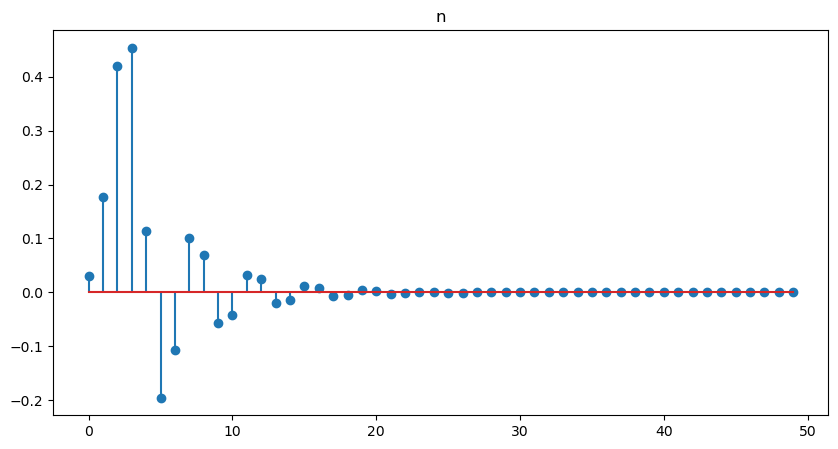

In [10]:
delta=np.zeros(50)
delta[0]=1
h1=signal.lfilter(B1,A1,delta)
_=plt.stem(h1)
_=plt.title('Respuesta impulsional del primer filtro digital')
_=plt.title('n')

**Observaciones**

Se ve que va decreciendo exponencialmente hacia cero. 

Mencionar que como es infinita se llama IIR


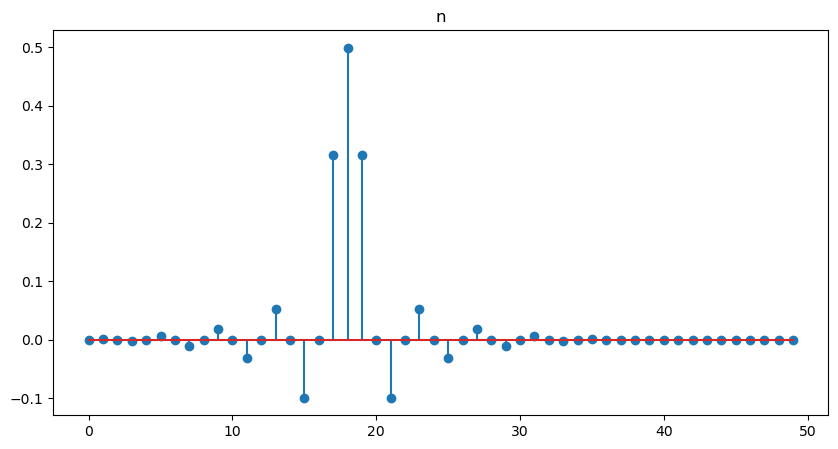

In [11]:
h2=signal.lfilter(B2,A2,delta)
_=plt.stem(h2)
_=plt.title('Respuesta impulsional del segundo filtro digital')
_=plt.title('n')

**Observaciones**

* Recuerda a una sinc truncada

* Las últimas muestras son exactamente cero, es decir tiene duración infinita.

* En realidad lo que vemos son las primeras 50 muestras de la respuesta impulsional.

* Este tipo de filtros se llama FIR por tener respuesta impulsiva finita.

  * Se reconocen porque el denominador A2==1
  
  * Tienen ciertas propiedades buenas:
    * Retardo constante para todas las frecuencias (fase lineal) si son simétricos. Especialmente interesantes en imágenes.
    * Estabilidad

In [12]:
#Comprobación de que son cero los últimos valores de h2

print(h2[-15:])

[1.6267e-03 1.5573e-18 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00]


______
# Respuesta en frecuencia

Cuando en un sistema LTI se introduce una sinusoide de una frecuencia $f_0$ a la salida se obtiene una sinusoide de la misma frecuencia:
* Cuya amplitud es la misma de la entrada multiplicada por una ganancia (que depende de $f_0$)
* Cuya fase es la de la entrada más un desfase (que también depende de $f_0$.

Poder amplificar y desfasar de manera diferente unas frecuencias u otras es la base del filtrado. 

A la función que nos indica la ganancia/desfase para cada frecuencia se le llama **respuesta en frecuencia**



## Obtención de la respuesta en frecuencia introduciendo tonos como señal de entrada.
Vamos a ver una primera forma de obtener la respuesta en frecuencia de un filtro digital.
* Generaremos una señal que será un tono de frecuencia $f_0$ de amplitud 1.
* Filtraremos dicha señal con el filtro del que deseamos conocer su respuesta en frecuencia usando *signal.lfilter()*
* Determinaremos la amplitud de la señal. Para ello, como son sinusoides discretas mediremos la potencia de la señal de salida y diremos que $Pot = A_{out}^2 /2$
* Como la entrada la generamos de amplitud $A_{in}=1$, $G(f_0)=A_{out}/A_{in}$
* Repetiremos para distintas frecuencias $f_1$, $f_2$,...

In [13]:
Ain =1
f_0 = 0.1 # Son frecuencias digitales, por tanto menores que 0.5
n=np.arange(50000) # Muchas muestras para estimar bien potencia de salida
x=Ain*np.cos(2*math.pi*f_0*n)

In [14]:
y=signal.lfilter(B1,A1,x)
Pot_out = np.mean(y**2)
Aout=math.sqrt(Pot_out*2.0)
print('G(',f_0,')=', Aout/Ain)

G( 0.1 )= 0.9999788021639348


Vemos que es prácticamente uno, es decir este filtro apenas modifica amplitud de entrada.

Vista la idea haremos un bucle para diferentes frecuencias para poder hacer gráfica

In [15]:
frecs = np.arange(0,0.5,0.02)

ganancias = np.zeros(frecs.shape)
k=0
for f in frecs:
    x=Ain*np.cos(2*math.pi*f*n)
    y=signal.lfilter(B1,A1,x)
    if f!=0:
        Pot_out = np.mean(y**2)
        Aout=math.sqrt(Pot_out*2.0)
    else:
        Aout = np.mean(y)
    ganancias[k]=Aout/Ain
    k+=1
    
    

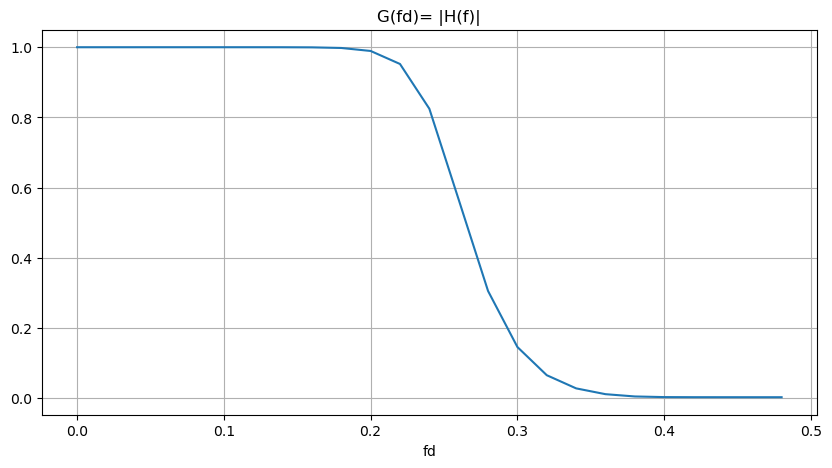

In [16]:
_=plt.plot(frecs,ganancias)
_=plt.grid()
_=plt.xlabel('fd')
_=plt.title('G(fd)= |H(f)|')

**Observaciones**
Vemos que el filtro 1, dado por B1,A1 se corresponde con un filtro paso bajo que permite pasar las frecuencias por debajo de 0.2 y atenúa las que están por encima de 0.35

Se podría también hacer algo para similar para estimar el desfase.

## Obtención de la respuesta en frecuencia mediante signal.freqz

Existe una función que permite calcular la respuesta en frecuencia de un filtro discreto en  un conjunto de frecuencias. Se llama *freqz()*

Emplea otro método diferente al visto aquí internamente. No obstante los resultados son los mismos.

La función devuelve dos vectores:
* H que es un vector de complejos de modo que para cada valor
  * El módulo sería la ganancia en amplitud vista
  * El argumento es el desfase que introduce el filtro.
* w es el vector de pulsaciones correspondiente

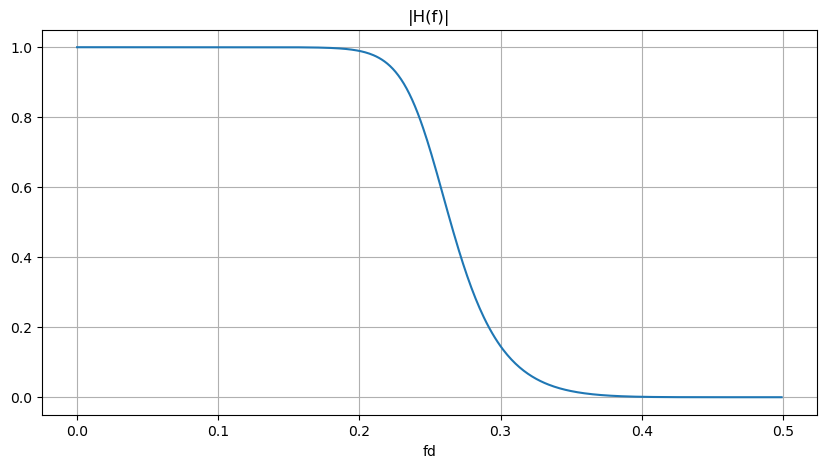

In [17]:
w,H=signal.freqz(B1,A1,512)#512 es el número de puntos de la gráfica
f=w/math.pi/2.0

_=plt.plot(f,np.absolute(H))# ¡OJO! en matlab se pone
_=plt.grid()
_=plt.xlabel('fd')
_=plt.title('|H(f)|')

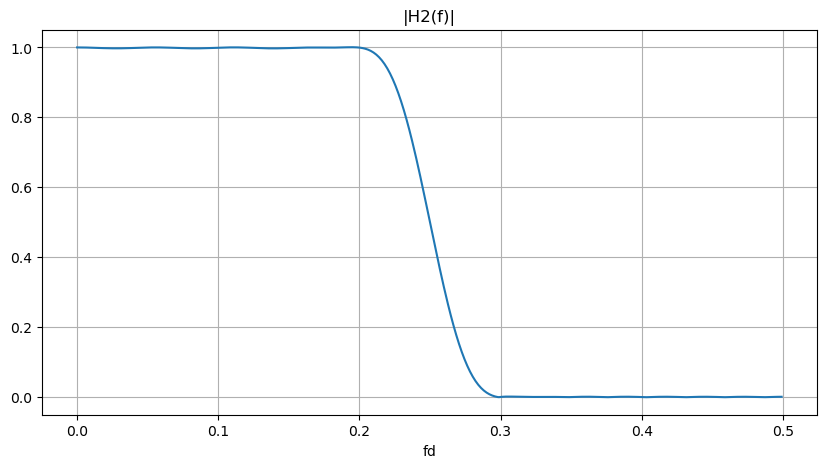

In [18]:
w2,H2=signal.freqz(B2,A2,512)#512 es el número de puntos de la gráfica
f2=w2/math.pi/2.0

_=plt.plot(f2,np.absolute(H2))# ¡OJO! en matlab se pone
_=plt.grid()
_=plt.xlabel('fd')
_=plt.title('|H2(f)|')

* Este método es más cómodo y rápido

* El primer método es más fácil de entender y además permite interpretar el sentido físico de respuesta en frecuencia.

## Determinación de los límites de la banda de paso y atenuada

En este apartado, veremos cómo determinar los límites de la banda de paso (margen de frecuencias donde la atenuación es menor que $\alpha _p$ dB ) y los de la banda atenuada (donde la atenuación es mayor de $\alpha _s$ dB )

La idea es no hacerlo " a ojo " sino mediante código.

Consideraremos 

* $\alpha _p$ = 3 dB

* $\alpha _s$ = 40 dB

In [22]:
# PASO 1: Determinar la atenuación en dB

atenuacion = - 20 * np.log10(np.abs(H))
alpha_p = 3
alpha_s = 40


In [26]:
indpaso = np.argwhere(atenuacion < alpha_p)
indaten = np.argwhere(atenuacion > alpha_s)

In [27]:
fpaso = np.max(f[indpaso])
faten = np.min(f[indaten])

print('Limite B Paso=',fpaso)
print('Limite B Aten=',faten)

Limite B Paso= 0.2490234375
Limite B Aten= 0.3623046875


# Filtrado de señales genéricas
En este punto veremos cómo filtrar señales de audio genéricas.

In [15]:
fs1,x1=upv_audio.read('audios/elvis_44.wav')
print(fs1,x1.shape)

44100 (7967855, 2)


In [16]:
fs2,x2=upv_audio.read('audios/elvis_16.wav')
print(fs2,x2.shape)

16000 (2890832, 2)


Son la misma canción a distintas frecuencias de muestreo. 

**¡OJO!** Son estereo

Filtraremos cada una de ellas.

De la documentación de lfilter
* scipy.signal.lfilter(b, a, x, **axis=- 1**) Si no le ponemos opción *axis*, toma *-1*. ¿Qué quiere decir que axis=-1?

Solución: El último eje!!


In [17]:
y1=signal.lfilter(B1,A1,x1,axis=0)
print(y1.shape)

(7967855, 2)


In [19]:
# Ahora filtramos la otra señal. Es la misma canción con la mitad de la frecuencia de muestreo
y1b=signal.lfilter(B1,A1,x2,axis=0)
print(y1b.shape)

(2890832, 2)


In [20]:
upv_audio.write('audios_out/filtrada_44.wav',fs1,y1)
upv_audio.write('audios_out/filtrada_16.wav',fs2,y1b)

Escuchar ambos audios y apreciar la diferencia. El uno es un filtrado a aprox. 11 Khz y el otro a 4 Khz

La frecuencia de corte digital es aprox. 0.25 (ver gráficas) en AMBOS CASOS

La frecuencia de corte digital es aprox 0.25 $f_s$
* fs = 44.1 --> fcorte$\approx$ 11
* fs = 16 --> fcorte$\approx$ 4

Observar espectro en AUDACITY (ajustar rango vertical). Debe quedar algo como:

<img src="images/s_filtradas.png" width=900>